# Study area maps

For upwelling manuscript, Moore-Maley et al. in prep

***

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import yaml
from cmocean import cm
from matplotlib.patches import Rectangle, Polygon
from cartopy import crs, feature
from salishsea_tools import viz_tools, places

%matplotlib inline

In [17]:
plt.rcParams['font.size'] = 12

In [53]:
# NEMO grid reference data
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')
lon, lat = grid.nav_lon.values, grid.nav_lat.values
tmask, bathy = mask.tmask[0, 0, ...].values, grid.Bathymetry.values

# Wind data stations
stations = [
    {'name': 'Sentry Shoal' , 'm': 'o', 's': 10},
    {'name': 'Sisters Islet', 'm': 's', 's': 9},
    {'name': 'Halibut Bank' , 'm': '^', 's': 11},
    {'name': 'Sand Heads'   , 'm': 'D', 's': 8},
]

# Upwelling locations
locations = [
    {'name': 'Discovery Passage', 'ji': (730, 125), 'c': 'powderblue'},
    {'name': 'Texada'           , 'ji': (637, 175), 'c': 'steelblue'},
    {'name': 'Central VI'       , 'ji': (546, 174), 'c': 'orange'},
    {'name': 'Boundary Pass'    , 'ji': (370, 300), 'c': 'mistyrose'},
]

# Annotations
annotations = [
    {'name': 'Pacific\nOcean'     , 'xy': (0.100, 0.350), 'r':   0, 'wt': None  , 'arrow': None},
    {'name': 'Puget\nSound'       , 'xy': (0.790, 0.180), 'r':   0, 'wt': 'bold', 'arrow': None},
    {'name': 'Juan de Fuca'       , 'xy': (0.345, 0.310), 'r': -17, 'wt': 'bold', 'arrow': None},
    {'name': 'Strait'             , 'xy': (0.550, 0.310), 'r':   0, 'wt': 'bold', 'arrow': None},
    {'name': 'Johnstone'          , 'xy': (0.045, 0.770), 'r': -20, 'wt': None  , 'arrow': None},
    {'name': 'Strait'             , 'xy': (0.165, 0.715), 'r': -70, 'wt': None  , 'arrow': None},
    {'name': 'Fraser\nRiver'      , 'xy': (0.720, 0.550), 'r':   0, 'wt': None  , 'arrow': None},
    {'name': 'Baynes\nSound'      , 'xy': (0.190, 0.590), 'r':   0, 'wt': None  , 'arrow': None},
    {'name': 'Strait of\nGeorgia' , 'xy': (0.300, 0.495), 'r':   0, 'wt': 'bold', 'arrow': (0.44, 0.53,  0.02,  0.02)},
    {'name': 'Discovery\nIslands' , 'xy': (0.320, 0.850), 'r':   0, 'wt': None  , 'arrow': (0.33, 0.84, -0.03, -0.04)},
    {'name': 'Haro\nStrait'       , 'xy': (0.470, 0.380), 'r':   0, 'wt': None  , 'arrow': (0.55, 0.39,  0.04,  0.00)},
]

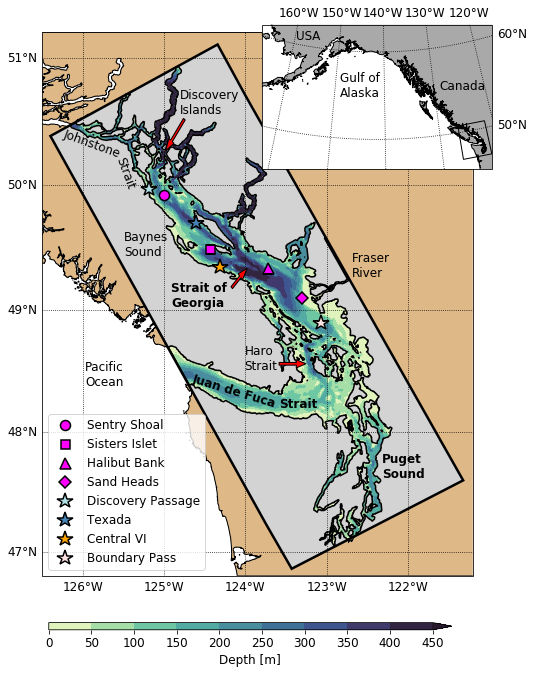

In [54]:
# ---------- Study Area Map -----------------
# Make figure
xlim, ylim = [-126.5, -121.2], [46.8, 51.2]
proj, proj_ref = crs.Mercator(np.mean(xlim), *ylim), crs.PlateCarree()
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': proj})

# ------------ Main Panel -------------------
# Map and projection
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood', zorder=0))
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True)
gl.top_labels, gl.right_labels = False, False

# Overlay model domain
c = ax.contourf(lon, lat, bathy, levels=np.arange(0, 451, 50), cmap=cm.deep, extend='max', transform=proj_ref)
ax.contourf(lon, lat, tmask, levels=[-0.01, 0.01], colors='lightgray', transform=proj_ref)
ax.contour(lon, lat, tmask, levels=[-0.01, 0.01], colors='k', transform=proj_ref)
corners = [(2, 0), (2, 1), (3, 1), (3, 0)]
for box, color in zip([(0, -1, 0, -1), (114, 397, 334, 897)], ['k']):
    xy = [(lon[box[j], box[i]], lat[box[j], box[i]]) for j, i in corners]
    ax.add_patch(Polygon(np.array(xy), fill=False, edgecolor=color, linewidth=2.5, transform=proj_ref))

# Annotations
for ann in annotations:
    ax.text(*ann['xy'], ann['name'], transform=ax.transAxes, rotation=ann['r'], fontdict={'weight': ann['wt'], 'color': 'k'})
    if ann['arrow'] is not None:
        ax.arrow(*ann['arrow'], width=0.005, head_width=0.015, edgecolor='k', facecolor='r', transform=ax.transAxes, zorder=10)

# Overlay wind stations
for stn in stations:
    ax.plot(
        *places.PLACES[stn['name']]['lon lat'], 'ko', label=stn['name'], transform=proj_ref,
        marker=stn['m'], markersize=stn['s'], markerfacecolor='magenta', markeredgewidth=1.5,
    )

# Overlay upwelling locations
for loc in locations:
    ax.plot(
        lon[loc['ji']], lat[loc['ji']], 'k*', label=loc['name'], transform=proj_ref,
        markersize=16, markerfacecolor=loc['c'], markeredgewidth=1.5,
    )

# Add legend
ax.legend(loc=3)

# ------------- Map Inset -------------------
# Map and projection
xmap, ymap = [-161, -122], [45, 62]
ax = fig.add_axes([0.52, 0.59, 0.4, 0.4], projection=crs.LambertConformal(np.mean(xmap), np.mean(ymap)))
ax.set_extent(xmap + ymap)
ax.add_feature(feature.GSHHSFeature('low', edgecolor='k', facecolor='darkgray'))
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, x_inline=False, ylocs=range(50, 61, 10))
gl.bottom_labels, gl.left_labels = False, False
gl.xlabel_style, gl.ylabel_style = {'rotation': 0}, {'rotation': 0}

# Overlay labels and region box
ax.text(0.34, 0.50, 'Gulf of\nAlaska', transform=ax.transAxes)
ax.text(0.77, 0.55, 'Canada', transform=ax.transAxes)
ax.text(0.15, 0.90, 'USA', transform=ax.transAxes)
ax.add_patch(Rectangle(
    (xlim[0], ylim[0]), int(np.diff(xlim)), int(np.diff(ylim)),
    transform=proj_ref, fill=False, edgecolor='k', zorder=2,
))

# Add colorbar for model bathymetry
cax = fig.add_axes([0.15, 0.05, 0.7, 0.01])
fig.colorbar(c, cax=cax, orientation='horizontal', label='Depth [m]')

fig.savefig('/home/bmoorema/Desktop/SSCdomainmap.pdf', bbox_inches='tight')